In [1]:
# 3.5.1　使用向量定义三维对象
vertices = [
    (1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)
]

def is_parallel(u, v):
    return u[0]*v[1] == u[1]*v[0] and u[1]*v[2] == u[2]*v[1] and u[0]*v[2] == u[2]*v[0]

def build_octahedron_edges(vertices):
    edges = []
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            if not is_parallel(vertices[i], vertices[j]):
                edges.append((i, j))
    return edges

def build_octahedron_faces(vertices):
    faces = []
    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            for k in range(j+1, len(vertices)):
                if not is_parallel(vertices[i], vertices[j]) and \
                   not is_parallel(vertices[j], vertices[k]) and \
                   not is_parallel(vertices[i], vertices[k]):
                    faces.append([vertices[i], vertices[j], vertices[k]])
    return faces

faces = build_octahedron_faces(vertices)

faces

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)],
 [(1, 0, 0), (0, 1, 0), (0, 0, -1)],
 [(1, 0, 0), (0, -1, 0), (0, 0, 1)],
 [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, 1, 0), (0, 0, 1)],
 [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
 [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
 [(-1, 0, 0), (0, -1, 0), (0, 0, -1)]]

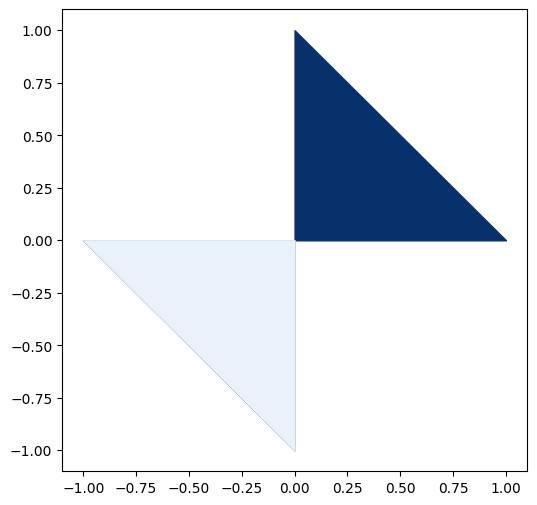

In [2]:
from vectors import *
from draw2d import *
import matplotlib

def component(v,direction):
    return (dot(v,direction) / length(direction))

def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

def unit(v):
    return scale(1./length(v), v)

def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

blues = matplotlib.colormaps.get_cmap('Blues')

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0 :
            c = color_map(1 - dot(unit(normal(face)), unit(light))) # 法线向量和光源向量的点积越大，阴影越少
            p = Polygon2D(*face_to_2d(face),fill=c, color=lines)    # 为每个三角形的边指定一个可选的lines参数，显示正在绘制的形状骨架
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

render(faces)

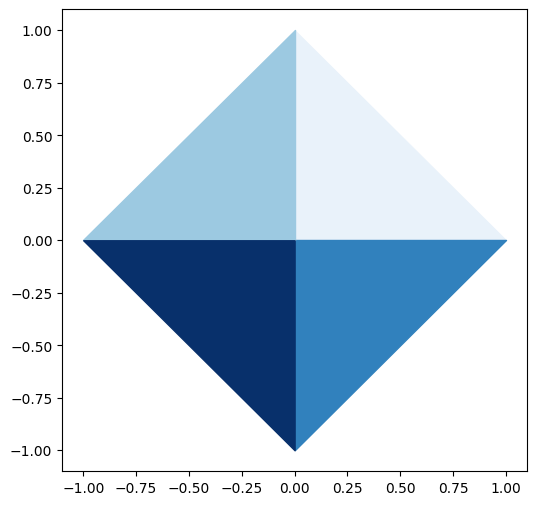

In [3]:
from vectors import dot, subtract, cross  # 假定这些函数在你的 vectors.py 中可用

def _face_centroid(face):
    return ((face[0][0] + face[1][0] + face[2][0]) / 3.0,
            (face[0][1] + face[1][1] + face[2][1]) / 3.0,
            (face[0][2] + face[1][2] + face[2][2]) / 3.0)

def _compute_center_from_faces(faces):
    verts = {}
    for f in faces:
        for v in f:
            verts[v] = verts.get(v, 0) + 1
    xs = sum(v[0] for v in verts) / len(verts)
    ys = sum(v[1] for v in verts) / len(verts)
    zs = sum(v[2] for v in verts) / len(verts)
    return (xs, ys, zs)

def orient_faces_outward(faces, center=None):
    """
    返回新的 faces 列表，保证每个面的法向量指向从 'center' 指向该面重心的方向。
    如果 center 为 None，会自动用所有顶点的平均位置作为中心（适用于凸多面体）。
    """
    if center is None:
        center = _compute_center_from_faces(faces)

    oriented = []
    for face in faces:
        n = cross(subtract(face[1], face[0]), subtract(face[2], face[0]))  # 与你 notebook 中 normal 相同
        c = _face_centroid(face)
        out_dir = subtract(c, center)
        if dot(n, out_dir) < 0:
            # 交换两个顶点以翻转法线（任意交换两点均可）
            oriented.append((face[0], face[2], face[1]))
        else:
            oriented.append(tuple(face))
    return oriented

octahedron = orient_faces_outward(faces, center=(0,0,0))  # 对于你给的八面体，中心是原点
octahedron
render(octahedron)